Getting the imports all in here.  The core to this is the "sklean" imports, which handle a lot of the work in the actual machine learning aspects of this project, most importantly Linear Regression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

Let's import the data and see what's in it and what might not be important for training

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [9]:
boston.filename

'/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/datasets/data/boston_house_prices.csv'

Based on each of these, data appears to be an array of arrays, which is going to be our X vector, while target is the target data, which is labeled at MEDV according to the description, and the feature_names are all of the labels.  Let's put this al together now into sometime we can use

In [10]:
data = boston.data
data = pd.DataFrame(data = data, columns = boston.feature_names)
data['MEDV'] = boston.target
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

Great, everything is now in one variable that we can reuse later.  Let's do some preliminary analysis on the data to see what's happening and what kind of patterns to look for

In [11]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Looking at the data above, we can see that there are no null values to worry about skewing our data and every entry has all values.  The one concern is the max value of MEDV being 50, which we know is the hard cap on that value even if the true value was greater.. we'll address this later.  For now, let's make a plot for each pair of features and see if there are any notable patterns

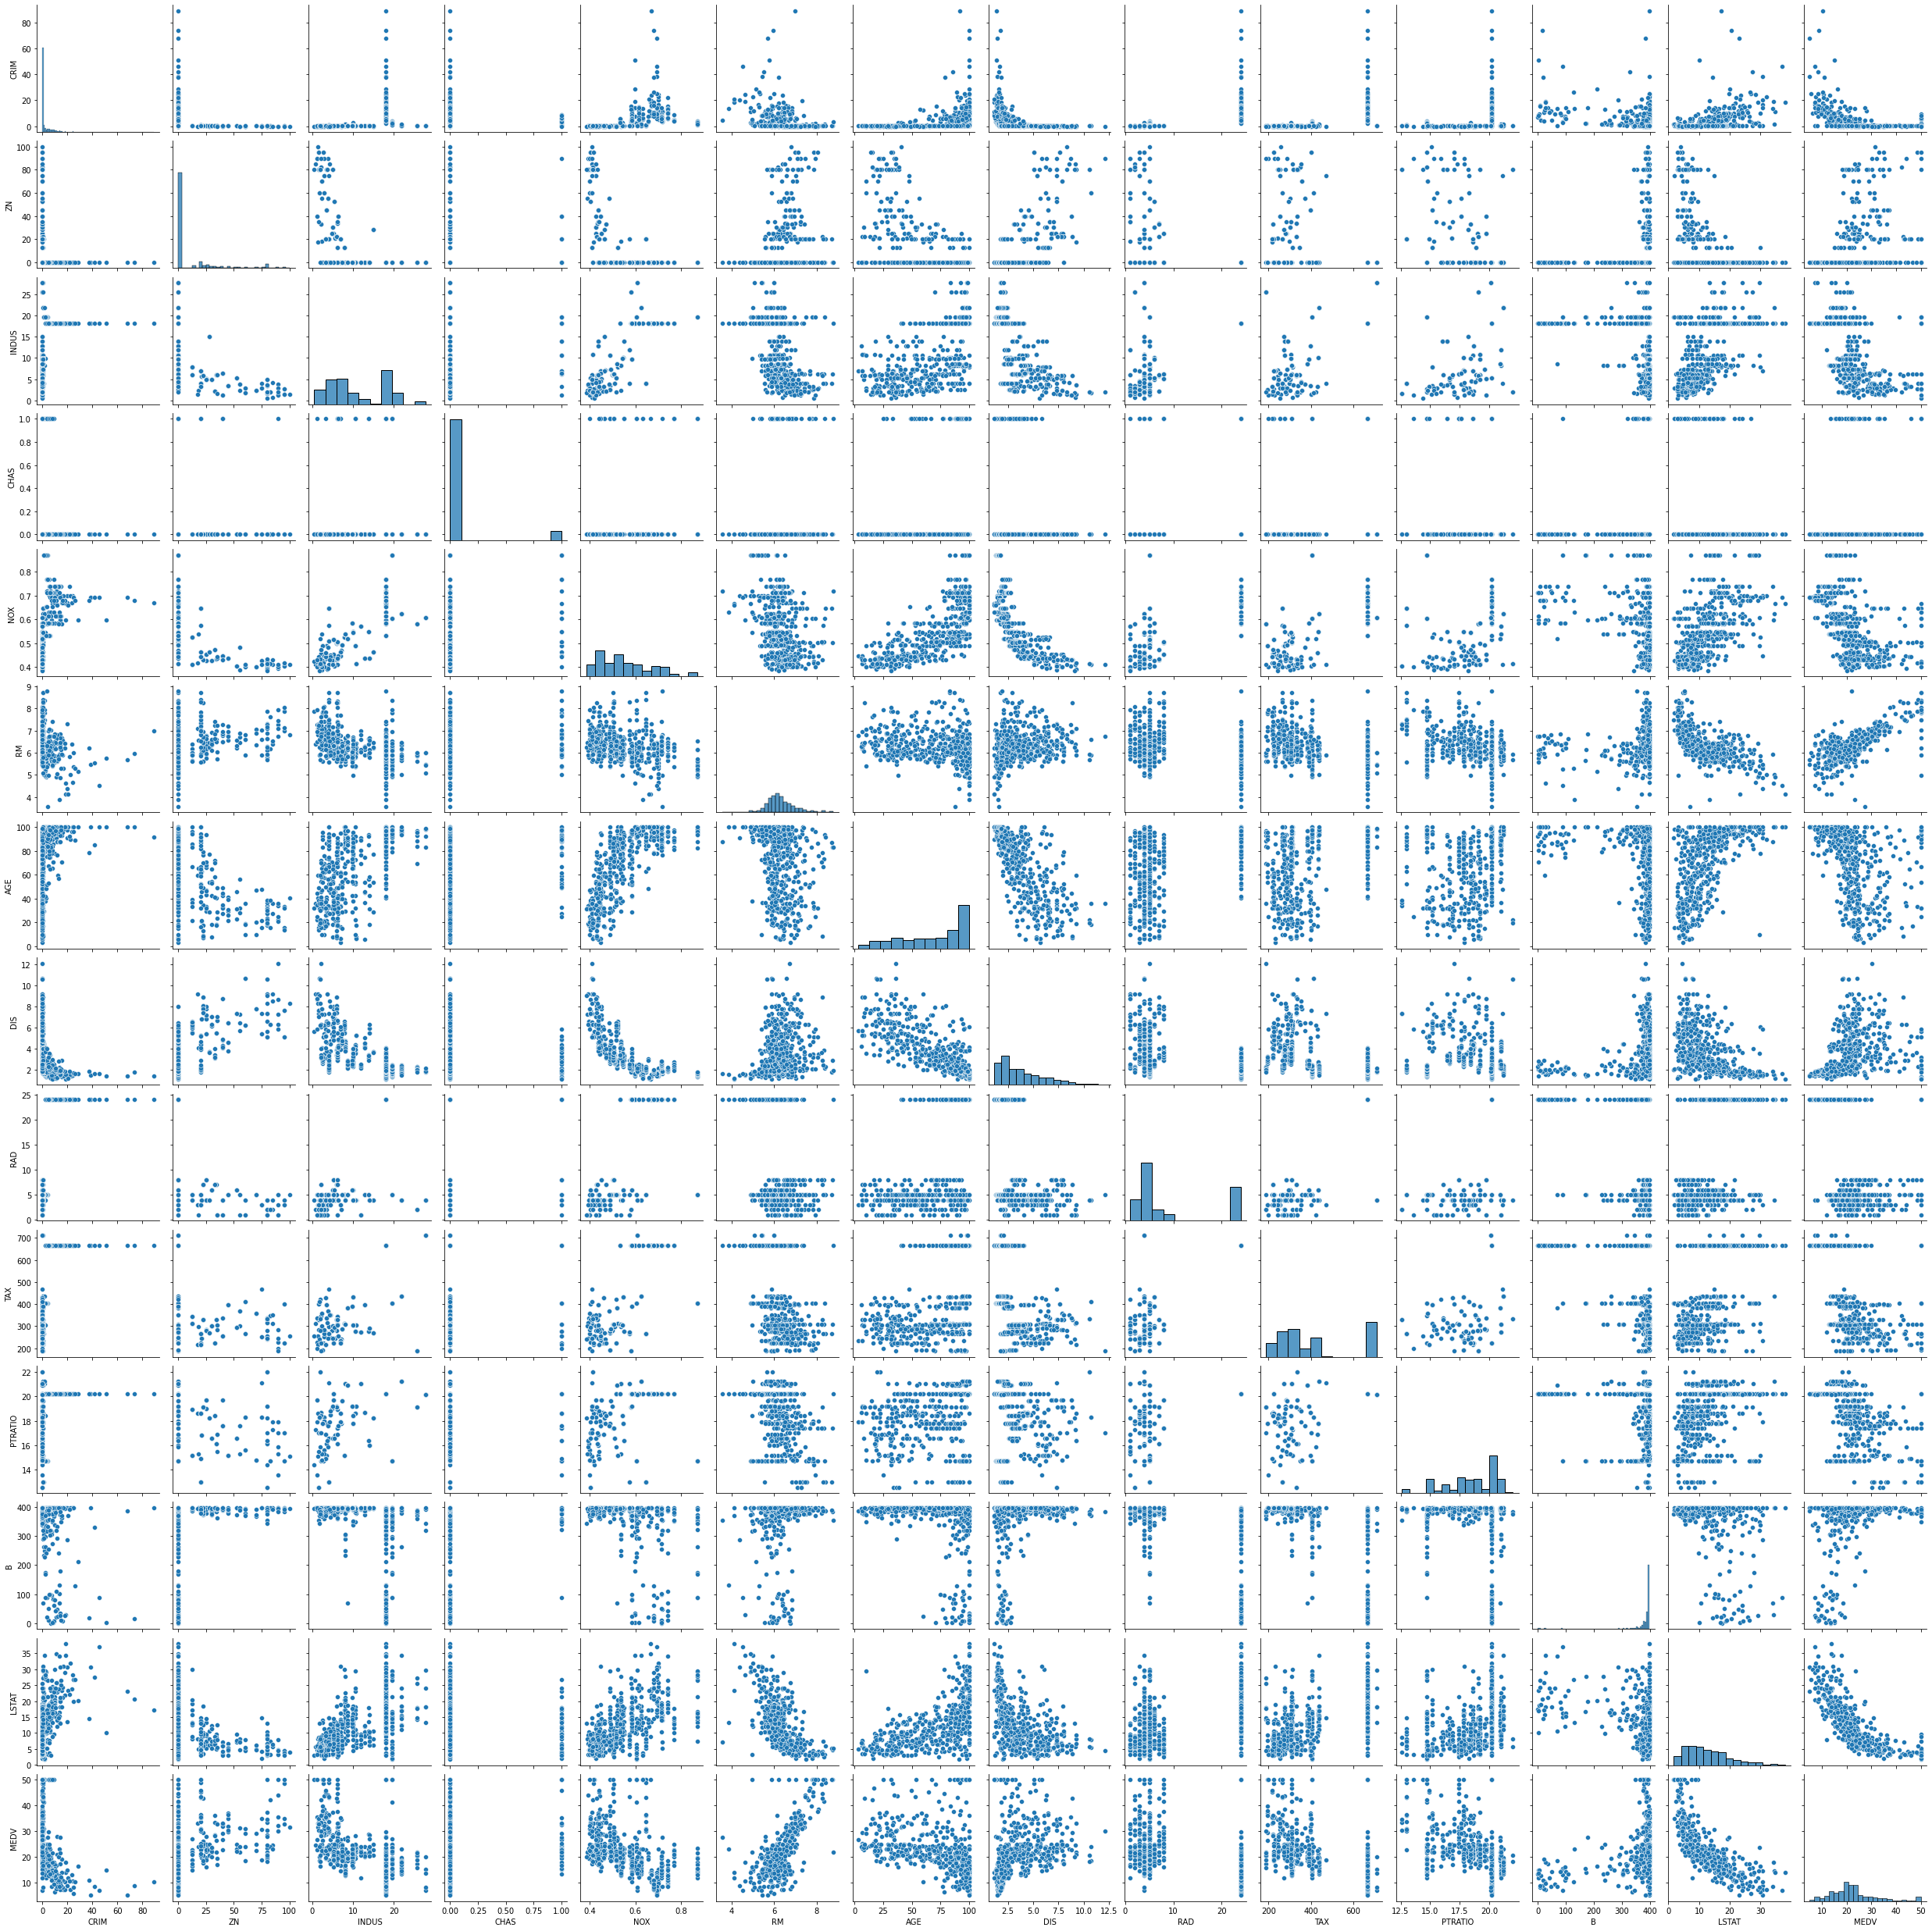

In [27]:
sns.pairplot(data)

A lot to look at, but some good candidates in regards to MEDV seem to be RM, or number of rooms, and LSTAT, or % lower status of the population.  Let's check out the correlation matrix to see how these patterns present themselves in terms of the data

In [14]:
corr = data.corr()
corr

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

As expected, those two have the highest absolute correlation percentages.  Now before getting too far into things, I want to define a few functions that will make playing with the data later a bit easier

In [15]:
# a function which accepts input data and a threshold and returns a new dataframe
# containing only the features with correlations above the threshold
def trimData(data, threshold):
    features = []
    corr = data.corr()['MEDV']
    
    # enumarate gets a counter paired with each data point
    for i, index in enumerate(corr.index):
        if abs(corr[index]) > threshold:
            # in cases where we exceed the threshold, add that feature
            # label to the features list
            features.append(index)
            
    print(features)
    new_data = data[features]
    return new_data

In [16]:
data_70_corr = trimData(data, 0.7)
data_60_corr = trimData(data, 0.6)
data_40_corr = trimData(data, 0.4)

['LSTAT', 'MEDV']
['RM', 'LSTAT', 'MEDV']
['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


In [17]:
def train_test_model(data, thresholds=[0], model=LinearRegression()):
    scores = []
    mae_list = []
    mse_list = []
    thresh_list = []
    features = []
    
    for threshold in thresholds:
        trimmed_data = trimData(data, threshold)
        
        X = trimmed_data.drop(labels=['MEDV'], axis=1)
        y = trimmed_data["MEDV"]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        scores.append(r2_score(y_test, predictions))
        mae_list.append(mean_absolute_error(y_test, predictions))
        mse_list.append(mean_squared_error(y_test, predictions))
        thresh_list.append(threshold)
        features.append(X.columns.values)

    result = pd.DataFrame(data = [thresh_list, features, scores, mae_list, mse_list],
                         index = ['Threshold', 'Features', 'Score', 'Mean Abs Error', 'Mean Square Error'])
    return result.T

In [18]:
thresholds = [0.0, .1, .2, .3, .4, .5, .6, .7]

train_test_model(data=data, thresholds=thresholds)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
['RM', 'PTRATIO', 'LSTAT', 'MEDV']
['RM', 'LSTAT', 'MEDV']
['LSTAT', 'MEDV']


Threshold                                           Features     Score  \
0         0  [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...  0.589222   
1       0.1  [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...  0.589222   
2       0.2  [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...  0.579849   
3       0.3  [CRIM, ZN, INDUS, NOX, RM, AGE, RAD, TAX, PTRA...  0.528773   
4       0.4              [INDUS, NOX, RM, TAX, PTRATIO, LSTAT]  0.476203   
5       0.5                               [RM, PTRATIO, LSTAT]  0.488164   
6       0.6                                        [RM, LSTAT]  0.540908   
7       0.7                                            [LSTAT]  0.430957   

  Mean Abs Error Mean Square Error  
0        3.84291            33.449  
1        3.84291            33.449  
2        3.83947           34.2123  
3        4.12438           38.3713  
4         4.3945           42.6519  
5        4.40443            41.678  
6        4.14244           37.3831  
7        4.86401           46.3363

What we can gather from this is that using the two features that we noted earlier give us the best result if only looking at some features, but using all of the features gives the best results.  It's still not a great result, but let's go back to earlier when mentioning the 50 cap on MEDV and see if we can improve the results by getting rid of any rows with MEDV=50

In [19]:
data_mod1 = data[data["MEDV"] < 50.0]
data_mod1.reset_index(drop=True, inplace=True)
train_test_model(data=data_mod1, thresholds=thresholds)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
['INDUS', 'RM', 'LSTAT', 'MEDV']
['LSTAT', 'MEDV']


Threshold                                           Features     Score  \
0         0  [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...  0.757694   
1       0.1  [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...  0.759177   
2       0.2  [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...  0.759177   
3       0.3  [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...  0.759177   
4       0.4  [CRIM, ZN, INDUS, NOX, RM, AGE, RAD, TAX, PTRA...  0.734549   
5       0.5              [INDUS, NOX, RM, TAX, PTRATIO, LSTAT]  0.717841   
6       0.6                                 [INDUS, RM, LSTAT]  0.646711   
7       0.7                                            [LSTAT]  0.526573   

  Mean Abs Error Mean Square Error  
0        3.13748           18.7357  
1        3.13297           18.6211  
2        3.13297           18.6211  
3        3.13297           18.6211  
4        3.30179           20.5254  
5        3.41983           21.8173  
6        3.98964           27.3172  
7         4.3507           36.6066

This improved our results significantly, but in addition, we are looking at some different features... it seems that the correlation matrix has changed and INDUS is now considered to have a higher correlation

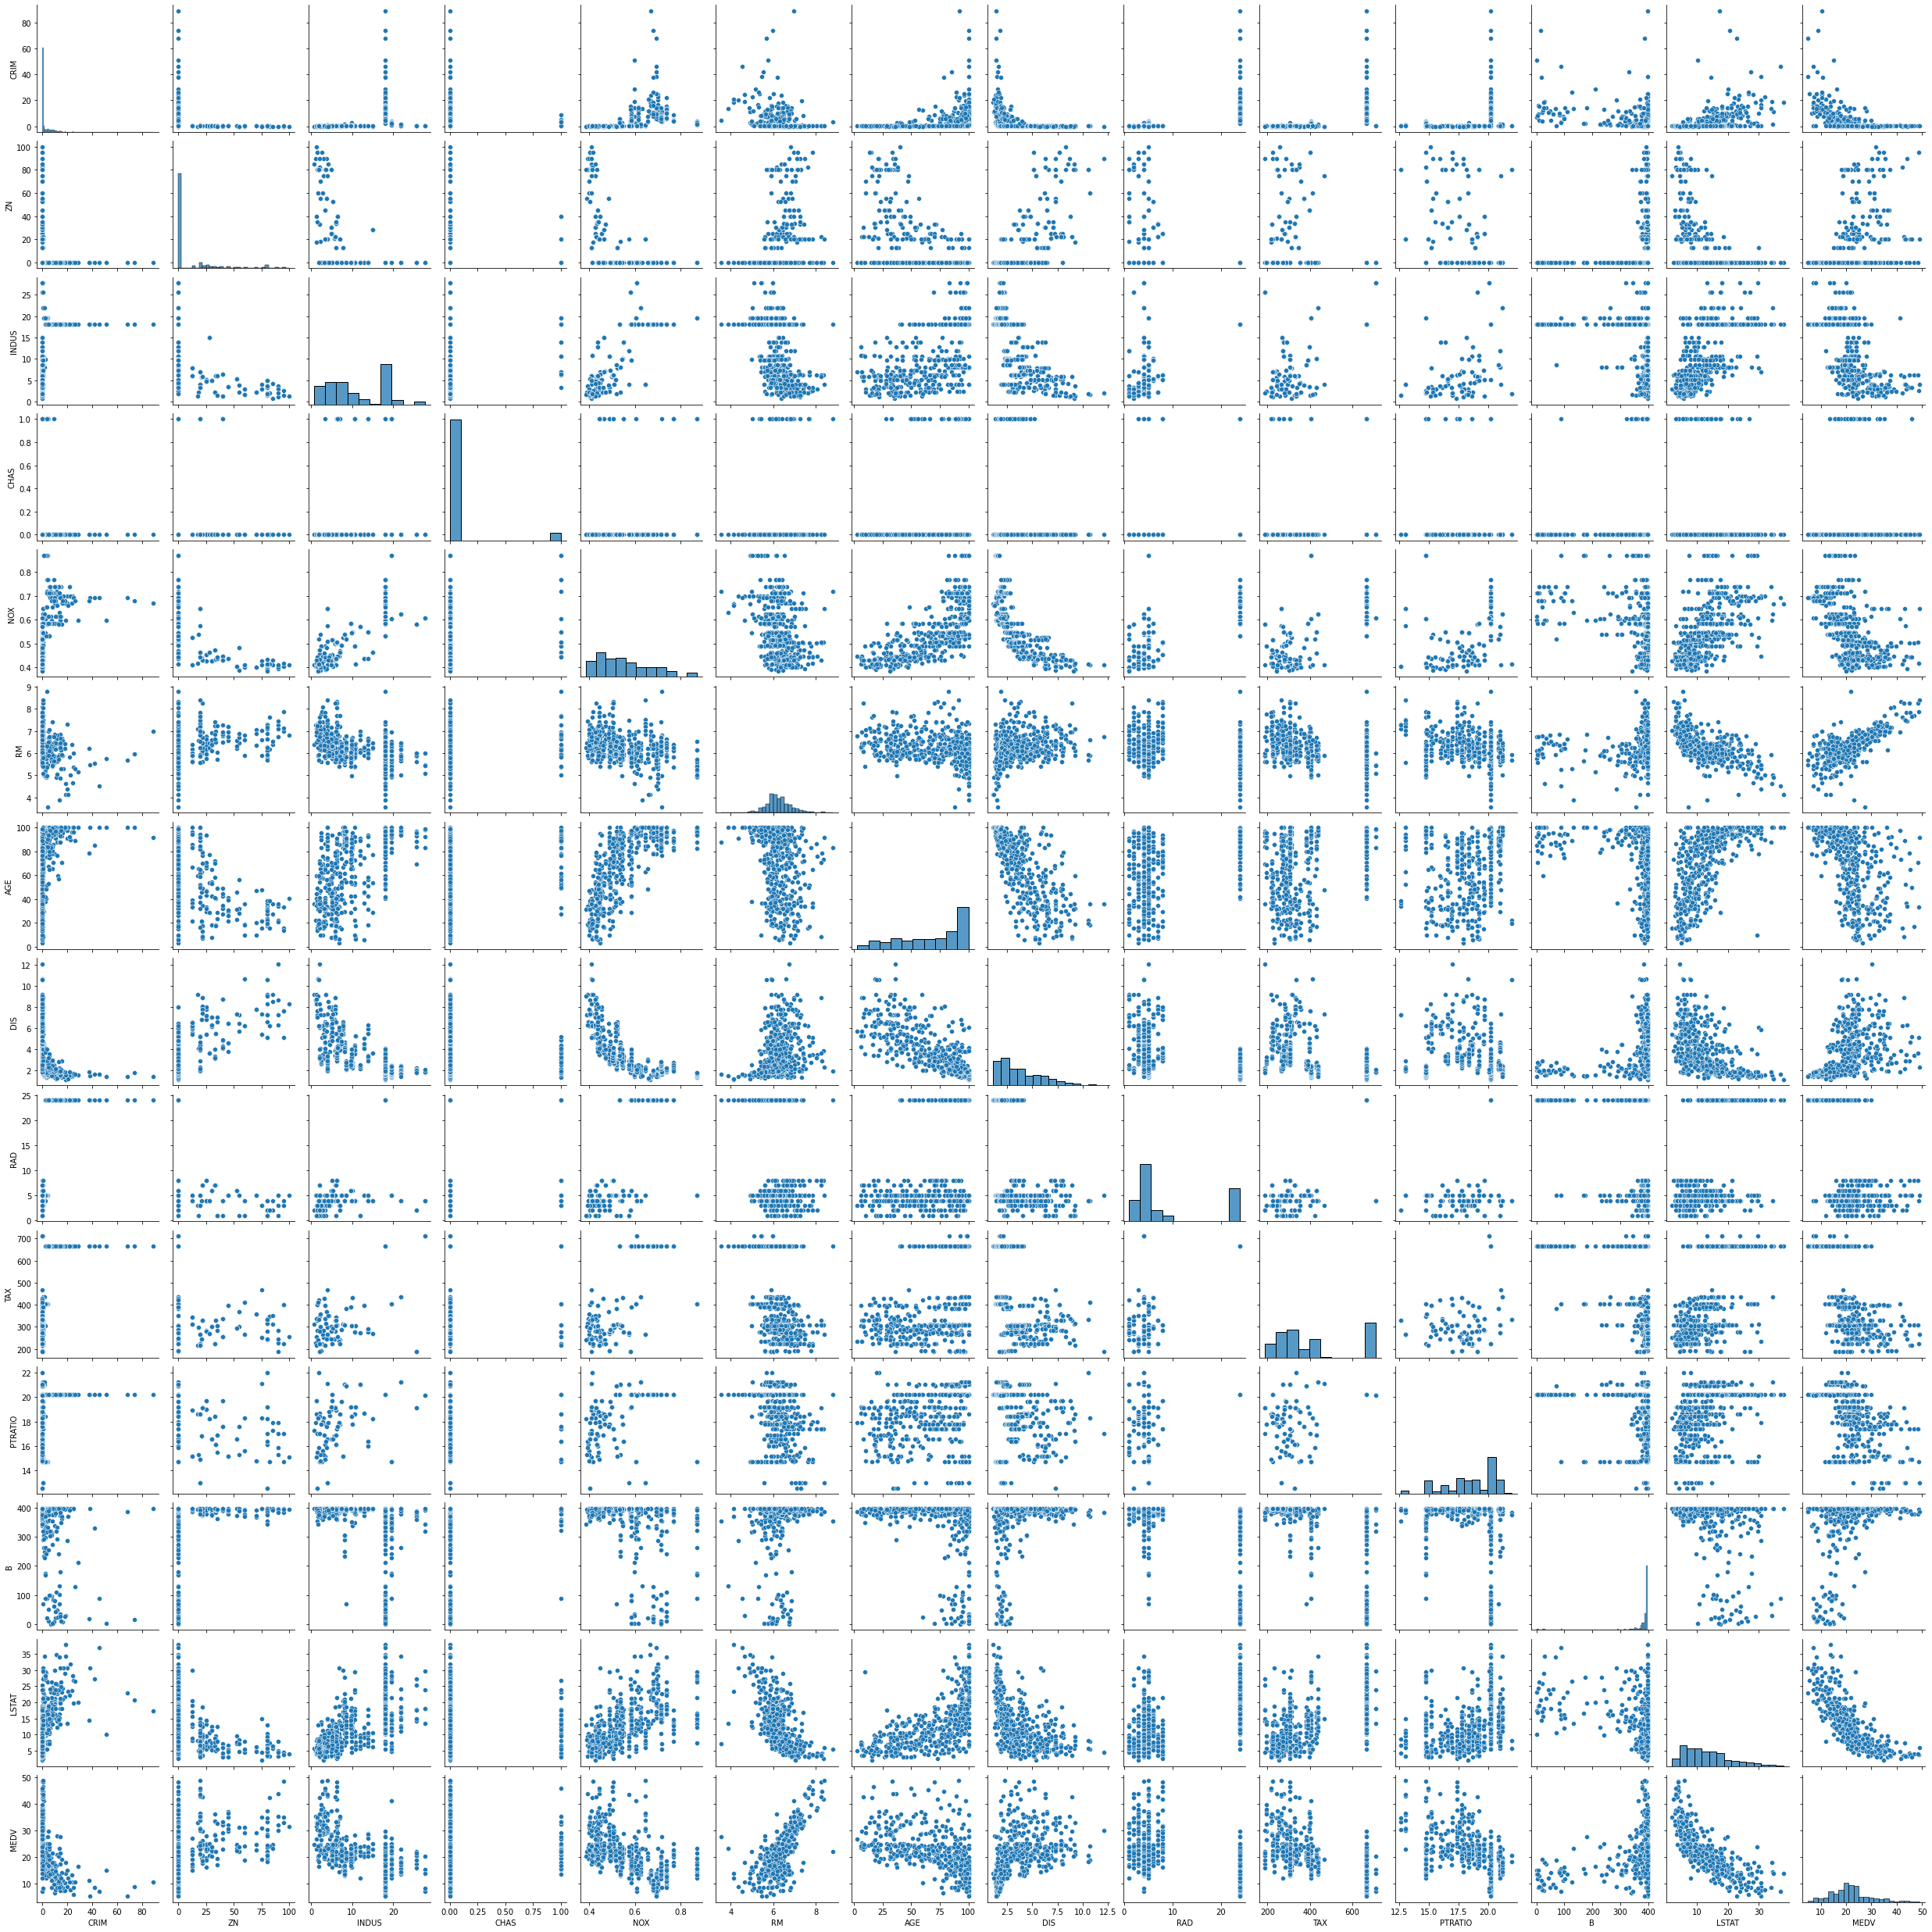

In [84]:
sns.pairplot(data_mod1)

I can see the correlation in INDUS, but it still seems very noisy.. let's try one more time with just the two most correlated features

In [20]:
data_mod1.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199075  0.408053 -0.064210  0.420476 -0.219307  0.353751   
ZN      -0.199075  1.000000 -0.527121 -0.053911 -0.512137  0.310506 -0.563184   
INDUS    0.408053 -0.527121  1.000000  0.035815  0.765155 -0.412413  0.637970   
CHAS    -0.064210 -0.053911  0.035815  1.000000  0.085619  0.044979  0.071194   
NOX      0.420476 -0.512137  0.765155  0.085619  1.000000 -0.322609  0.727671   
RM      -0.219307  0.310506 -0.412413  0.044979 -0.322609  1.000000 -0.268464   
AGE      0.353751 -0.563184  0.637970  0.071194  0.727671 -0.268464  1.000000   
DIS     -0.382231  0.673227 -0.710284 -0.077705 -0.768122  0.245789 -0.743043   
RAD      0.627434 -0.307726  0.596124 -0.032786  0.612160 -0.195768  0.451939   
TAX      0.583711 -0.302897  0.717678 -0.067743  0.667380 -0.281955  0.499682   
PTRATIO  0.287079 -0.381815  0.387656 -0.116830  0.188381 -0.293299  0.268459   
B       -0.384460  0.176117 -0.363394  0.041707 -0.383087  0.119204 -0.279002   
LSTAT    0.461755 -0.422090  0.636527 -0.006486  0.612444 -0.610369  0.637879   
MEDV    -0.450115  0.404608 -0.600005  0.074803 -0.524451  0.686634 -0.492915   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.382231  0.627434  0.583711  0.287079 -0.384460  0.461755 -0.450115  
ZN       0.673227 -0.307726 -0.302897 -0.381815  0.176117 -0.422090  0.404608  
INDUS   -0.710284  0.596124  0.717678  0.387656 -0.363394  0.636527 -0.600005  
CHAS    -0.077705 -0.032786 -0.067743 -0.116830  0.041707 -0.006486  0.074803  
NOX     -0.768122  0.612160  0.667380  0.188381 -0.383087  0.612444 -0.524451  
RM       0.245789 -0.195768 -0.281955 -0.293299  0.119204 -0.610369  0.686634  
AGE     -0.743043  0.451939  0.499682  0.268459 -0.279002  0.637879 -0.492915  
DIS      1.000000 -0.491875 -0.532025 -0.246773  0.299426 -0.536493  0.368813  
RAD     -0.491875  1.000000  0.909000  0.456035 -0.451534  0.510192 -0.476296  
TAX     -0.532025  0.909000  1.000000  0.452252 -0.448211  0.566467 -0.572442  
PTRATIO -0.246773  0.456035  0.452252  1.000000 -0.173636  0.358023 -0.518641  
B        0.299426 -0.451534 -0.448211 -0.173636  1.000000 -0.364099  0.364928  
LSTAT   -0.536493  0.510192  0.566467  0.358023 -0.364099  1.000000 -0.759837  
MEDV     0.368813 -0.476296 -0.572442 -0.518641  0.364928 -0.759837  1.000000

In [21]:
train_test_model(data=data_mod1, thresholds=[.64])

['RM', 'LSTAT', 'MEDV']


Threshold     Features     Score Mean Abs Error Mean Square Error
0      0.64  [RM, LSTAT]  0.626553        4.04042           28.8759

still low, so having all the data  seems to be the best predictor.

Here is a function I found online that helps display the training score/cross validation score to see how the model improves with new training data.  This is not my own code, but I want to use it to visualize what's going on.

Copied from this video at this timestamp: https://youtu.be/ZeM2tHtjGy4?t=7221

In [22]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

In [23]:
def show_curves(data, threshold=0.0):
    corr_data = trimData(data, threshold)
    X = corr_data.drop(labels = ['MEDV'], axis = 1)
    y = corr_data['MEDV']

    title = "Learning Curves (Linear Regression) " + str(X.columns.values)

    cs = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    estimator = LinearRegression()
    plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cs, n_jobs=-1)

    plt.show()

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


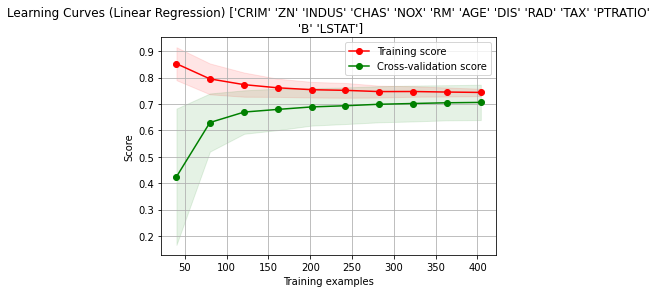

In [24]:
show_curves(data)

['RM', 'LSTAT', 'MEDV']


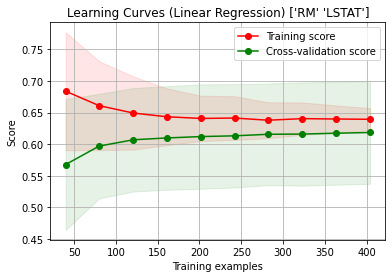

In [25]:
show_curves(data, .6)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


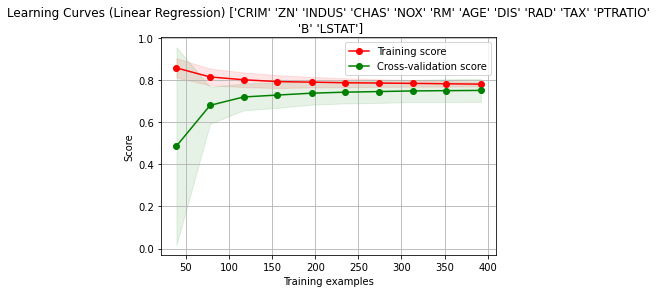

In [26]:
show_curves(data_mod1)

Can we do better?  Let's try a heat map to better see if there are any other correlations, maybe some features can be comined

<AxesSubplot:>

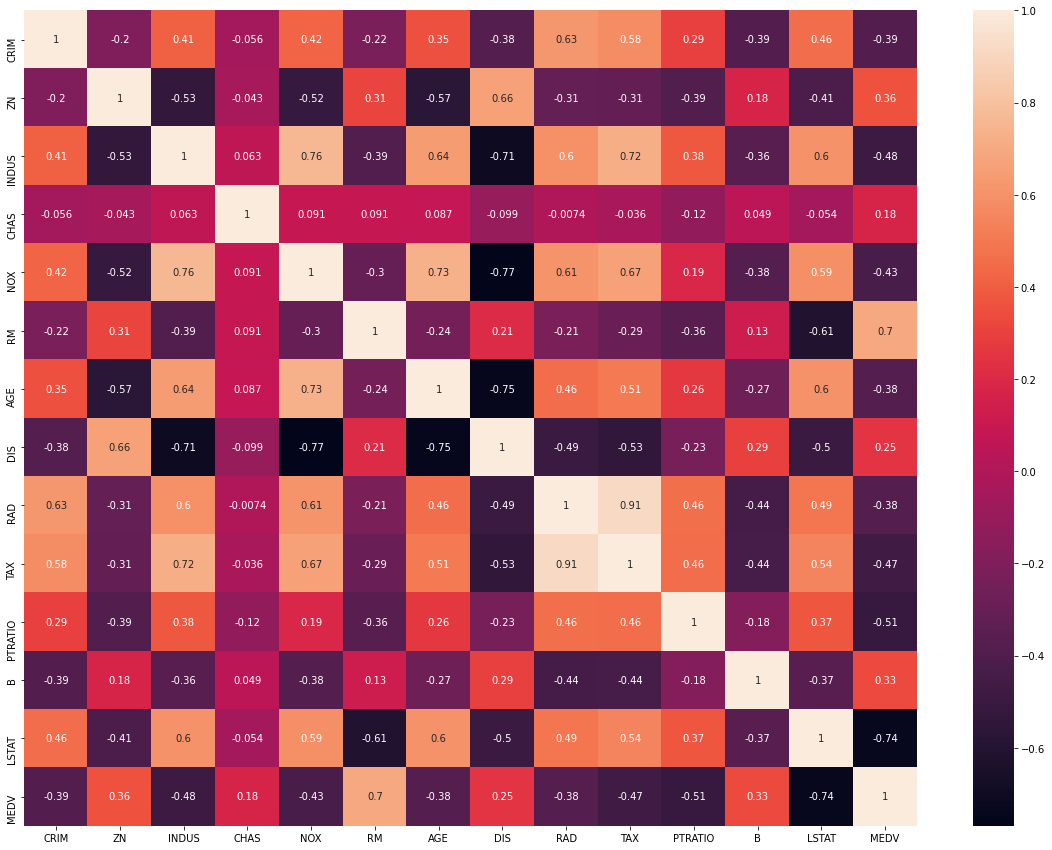

In [117]:
plt.subplots(figsize = (20,15))
sns.heatmap(data.corr(), annot=True)

So some things that have high correlation:

TAX + RAD: .91

INDUS + NOX: .76

TAX + INDUS: .72

LSTAT + RM: -.61

DIS + NOX: -.77


There are others in the .7 ~ .6 range plus or minus, but going through all of them may take time.  Let's instead try the top three pairs and make new columns with the ratio of each pair and see how that might change things.

In [27]:
data_mod2 = data_mod1.copy()

data_mod2['TAX/RAD'] = data_mod2['TAX']/data_mod2['RAD']

data_mod2['DIS/NOX'] = data_mod2['DIS']/data_mod2['NOX']

data_mod2 = data_mod2.drop(['DIS', 'NOX', 'TAX', 'RAD'], axis=1)

data_mod2

CRIM    ZN  INDUS  CHAS     RM   AGE  PTRATIO       B  LSTAT  MEDV  \
0    0.00632  18.0   2.31   0.0  6.575  65.2     15.3  396.90   4.98  24.0   
1    0.02731   0.0   7.07   0.0  6.421  78.9     17.8  396.90   9.14  21.6   
2    0.02729   0.0   7.07   0.0  7.185  61.1     17.8  392.83   4.03  34.7   
3    0.03237   0.0   2.18   0.0  6.998  45.8     18.7  394.63   2.94  33.4   
4    0.06905   0.0   2.18   0.0  7.147  54.2     18.7  396.90   5.33  36.2   
..       ...   ...    ...   ...    ...   ...      ...     ...    ...   ...   
485  0.06263   0.0  11.93   0.0  6.593  69.1     21.0  391.99   9.67  22.4   
486  0.04527   0.0  11.93   0.0  6.120  76.7     21.0  396.90   9.08  20.6   
487  0.06076   0.0  11.93   0.0  6.976  91.0     21.0  396.90   5.64  23.9   
488  0.10959   0.0  11.93   0.0  6.794  89.3     21.0  393.45   6.48  22.0   
489  0.04741   0.0  11.93   0.0  6.030  80.8     21.0  396.90   7.88  11.9   

     TAX/RAD    DIS/NOX  
0      296.0   7.602230  
1      121.0  10.590832  
2      121.0  10.590832  
3       74.0  13.236245  
4       74.0  13.236245  
..       ...        ...  
485    273.0   4.325654  
486    273.0   3.992147  
487    273.0   3.782723  
488    273.0   4.169110  
489    273.0   4.371728  

[490 rows x 12 columns]

In [28]:
thresholds = [0.0, .1, .2, .3, .4, .5, .6, .7]

train_test_model(data=data_mod2, thresholds=thresholds)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'TAX/RAD', 'DIS/NOX']
['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'TAX/RAD', 'DIS/NOX']
['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'DIS/NOX']
['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'DIS/NOX']
['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'LSTAT', 'MEDV']
['INDUS', 'RM', 'PTRATIO', 'LSTAT', 'MEDV']
['INDUS', 'RM', 'LSTAT', 'MEDV']
['LSTAT', 'MEDV']


Threshold                                           Features     Score  \
0         0  [CRIM, ZN, INDUS, CHAS, RM, AGE, PTRATIO, B, L...  0.749783   
1       0.1  [CRIM, ZN, INDUS, RM, AGE, PTRATIO, B, LSTAT, ...  0.751989   
2       0.2  [CRIM, ZN, INDUS, RM, AGE, PTRATIO, B, LSTAT, ...  0.737967   
3       0.3  [CRIM, ZN, INDUS, RM, AGE, PTRATIO, B, LSTAT, ...  0.737967   
4       0.4         [CRIM, ZN, INDUS, RM, AGE, PTRATIO, LSTAT]  0.720141   
5       0.5                        [INDUS, RM, PTRATIO, LSTAT]  0.708717   
6       0.6                                 [INDUS, RM, LSTAT]  0.646711   
7       0.7                                            [LSTAT]  0.526573   

  Mean Abs Error Mean Square Error  
0        3.20507           19.3474  
1        3.20606           19.1768  
2        3.32893           20.2611  
3        3.32893           20.2611  
4         3.4109           21.6395  
5         3.5241           22.5227  
6        3.98964           27.3172  
7         4.3507           36.6066

All around worse, so removing any data or condensing it doesn't seem to be much help.  A small thing to note, however, is that now passing the .1 threshold yeilds better results as opposed to using everything.  Notably, it was the TAX/RAD that was removed, which seemed to be the most correlated internally, but actually seemed to hurt predictions for MEDV.  One more thing to try is to remove rows containing outlier data.  For this, we need to focus on the data with the most correlation, as noisy data won't make sense to search for outliers as there will be so many.
Let's first make a separate dataframe just for the highest correlated data and take a closer look at their scatter plots.  The most correlated data was
LSTAT, RM, DIS, NOX, INDUS, AGE.  Tax/Rad seemed useful, but looking at the scatter plots they aren't really as connected as it might appear.

In [63]:
small_set = data_mod1[['LSTAT', 'RM', 'DIS', 'NOX', 'INDUS', 'AGE', 'MEDV']].copy()
small_set

LSTAT     RM     DIS    NOX  INDUS   AGE  MEDV
0     4.98  6.575  4.0900  0.538   2.31  65.2  24.0
1     9.14  6.421  4.9671  0.469   7.07  78.9  21.6
2     4.03  7.185  4.9671  0.469   7.07  61.1  34.7
3     2.94  6.998  6.0622  0.458   2.18  45.8  33.4
4     5.33  7.147  6.0622  0.458   2.18  54.2  36.2
..     ...    ...     ...    ...    ...   ...   ...
485   9.67  6.593  2.4786  0.573  11.93  69.1  22.4
486   9.08  6.120  2.2875  0.573  11.93  76.7  20.6
487   5.64  6.976  2.1675  0.573  11.93  91.0  23.9
488   6.48  6.794  2.3889  0.573  11.93  89.3  22.0
489   7.88  6.030  2.5050  0.573  11.93  80.8  11.9

[490 rows x 7 columns]

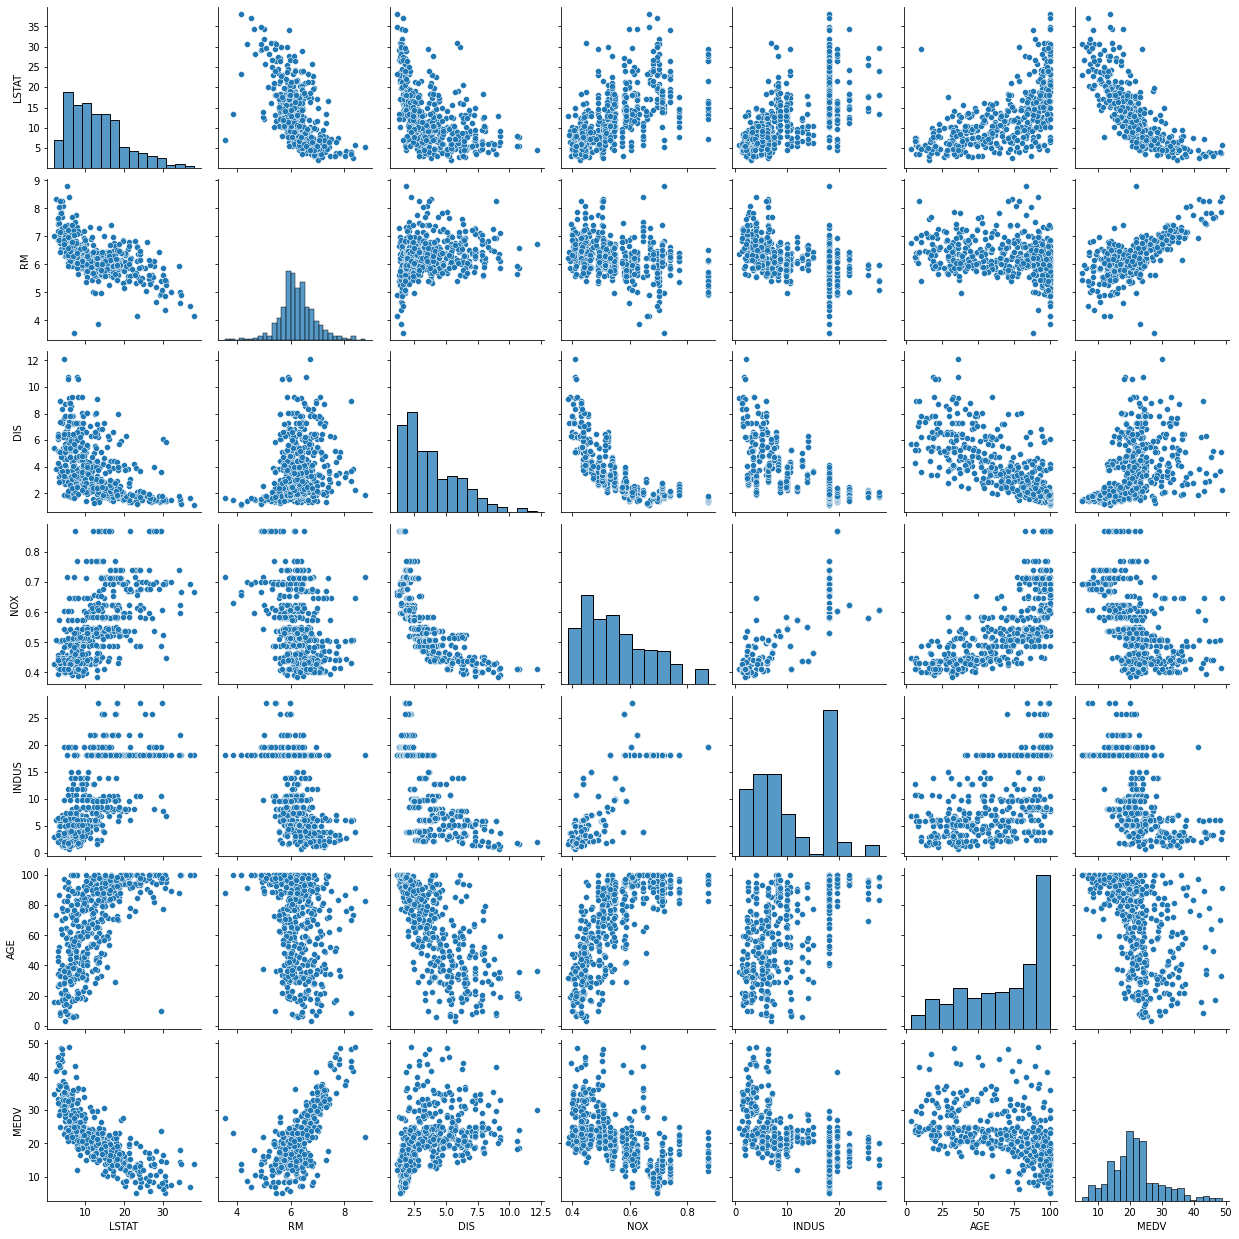

In [64]:
sns.pairplot(small_set)

A couple things to notice: Age seems to cap at 100.  There are a few outliers that may be worth removing, but first I want to reduce the data size again to homes less than 100 years

In [31]:
data_mod3 = data_mod1[data_mod1["AGE"] < 100.0]
data_mod3.reset_index(drop=True, inplace=True)
train_test_model(data=data_mod3, thresholds=thresholds)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
['RM', 'LSTAT', 'MEDV']
['RM', 'LSTAT', 'MEDV']


Threshold                                           Features     Score  \
0         0  [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...  0.832845   
1       0.1  [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...  0.832941   
2       0.2  [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...  0.832941   
3       0.3  [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...  0.832941   
4       0.4  [CRIM, INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO,...  0.769656   
5       0.5              [INDUS, NOX, RM, TAX, PTRATIO, LSTAT]  0.769028   
6       0.6                                        [RM, LSTAT]  0.703336   
7       0.7                                        [RM, LSTAT]  0.703336   

  Mean Abs Error Mean Square Error  
0        2.31691           10.6461  
1        2.31448           10.6399  
2        2.31448           10.6399  
3        2.31448           10.6399  
4        2.92413           14.6706  
5        2.93824           14.7105  
6        3.31214           18.8945  
7        3.31214           18.8945

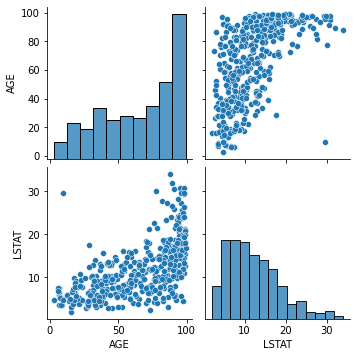

In [32]:
sns.pairplot(data_mod3[['AGE, 'LSTAT']])

There are two data points here that I would like to remove

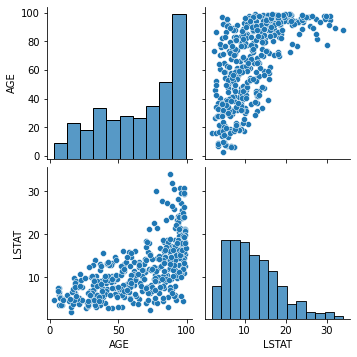

In [57]:
outliers = data_mod3[(data_mod3['LSTAT'] > 17.0) & (data_mod3['AGE'] < 40.0)].index
outliers
data_mod4 = data_mod3.drop(outliers)
data_mod4.reset_index(drop=True, inplace=True)
#train_test_model(data=data_mod3, thresholds=thresholds)
sns.pairplot(data_mod4[['AGE', 'LSTAT']])

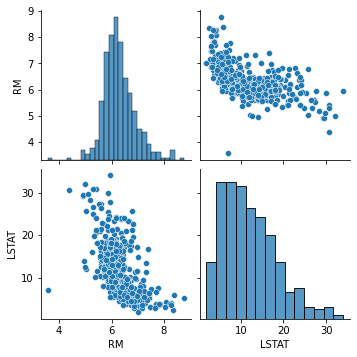

In [59]:
sns.pairplot(data_mod4[['RM', 'LSTAT']])

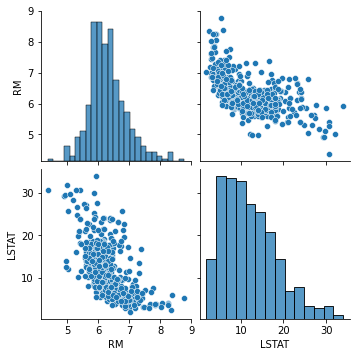

In [62]:
outliers = data_mod4[(data_mod4['LSTAT'] < 10.0) & (data_mod4['RM'] < 4.0)].index
outliers
data_mod4 = data_mod4.drop(outliers)
data_mod4.reset_index(drop=True, inplace=True)
sns.pairplot(data_mod4[['RM', 'LSTAT']])

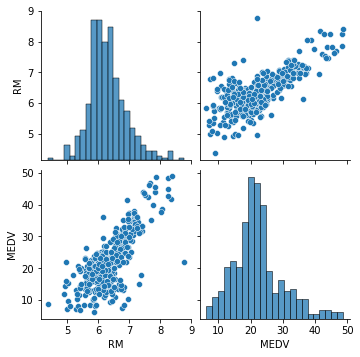

In [65]:
sns.pairplot(data_mod4[['RM', 'MEDV']])

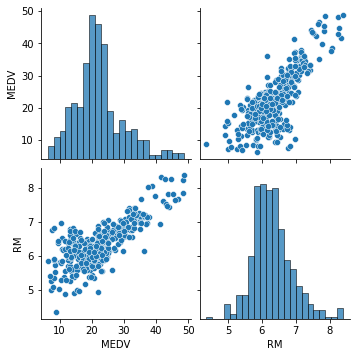

In [71]:
outliers = data_mod4[(data_mod4['MEDV'] < 22.0) & (data_mod4['RM'] > 7.0)].index
outliers
data_mod4 = data_mod4.drop(outliers)
data_mod4.reset_index(drop=True, inplace=True)
sns.pairplot(data_mod4[['MEDV', 'RM']])

We've now trimmed a handful of outliers, let's see how the results change

In [72]:
train_test_model(data=data_mod4, thresholds=thresholds)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
['RM', 'LSTAT', 'MEDV']
['RM', 'LSTAT', 'MEDV']


Threshold                                           Features     Score  \
0         0  [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...  0.853518   
1       0.1  [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...   0.85256   
2       0.2  [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...   0.85256   
3       0.3  [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...   0.85256   
4       0.4  [CRIM, INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO,...  0.795056   
5       0.5              [INDUS, NOX, RM, TAX, PTRATIO, LSTAT]  0.798138   
6       0.6                                        [RM, LSTAT]  0.719689   
7       0.7                                        [RM, LSTAT]  0.719689   

  Mean Abs Error Mean Square Error  
0        2.10158           8.81732  
1         2.1351           8.87499  
2         2.1351           8.87499  
3         2.1351           8.87499  
4         2.5773           12.3363  
5        2.57015           12.1509  
6        3.00704            16.873  
7        3.00704            16.873

Best predictions yet!  One final test I would like to do now is to train on this data, but make predictions on the full set of data.  Going to need to slightly modify the functions from earlier to get this to work.

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [74]:
data_mod4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     443 non-null    float64
 1   ZN       443 non-null    float64
 2   INDUS    443 non-null    float64
 3   CHAS     443 non-null    float64
 4   NOX      443 non-null    float64
 5   RM       443 non-null    float64
 6   AGE      443 non-null    float64
 7   DIS      443 non-null    float64
 8   RAD      443 non-null    float64
 9   TAX      443 non-null    float64
 10  PTRATIO  443 non-null    float64
 11  B        443 non-null    float64
 12  LSTAT    443 non-null    float64
 13  MEDV     443 non-null    float64
dtypes: float64(14)
memory usage: 48.6 KB


['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


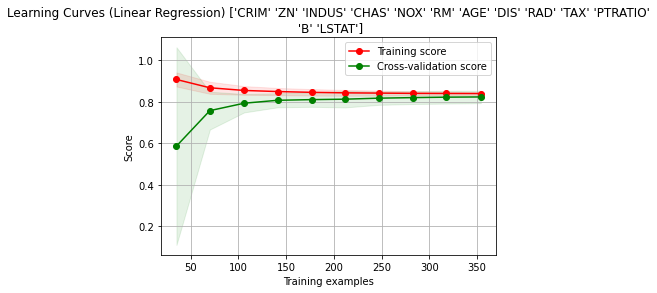

In [139]:
show_curves(data_mod4)

In [137]:
def train_test_model_2(data, data_small, thresholds=[0], model=LinearRegression()):
    scores = []
    mae_list = []
    mse_list = []
    thresh_list = []
    features = []
    
    above50 = data[data["MEDV"] == 50.0]
    above50.reset_index(drop=True, inplace=True)
    
    for threshold in thresholds:
        trimmed_data = trimData(data_small, threshold)
        trimmed_extra =above50[(data.columns & trimmed_data.columns)]
        
        X = trimmed_data.drop(labels=['MEDV'], axis=1)
        y = trimmed_data["MEDV"]
        
        X2 = trimmed_extra.drop(labels=['MEDV'], axis=1)
        y2 = trimmed_extra["MEDV"]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
        
        # append the removed rows
        X_test = X_test.append(X2)
        y_test = y_test.append(y2)
        
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        # cut off predictions over 50, as those are rounded down anyways
        predictions = np.clip(predictions, 0.0, 50.0)
        
        scores.append(r2_score(y_test, predictions))
        mae_list.append(mean_absolute_error(y_test, predictions))
        mse_list.append(mean_squared_error(y_test, predictions))
        thresh_list.append(threshold)
        features.append(X.columns.values)

    result = pd.DataFrame(data = [thresh_list, features, scores, mae_list, mse_list],
                         index = ['Threshold', 'Features', 'Score', 'Mean Abs Error', 'Mean Square Error'])
    return result.T

In [138]:
train_test_model_2(data, data_mod4, thresholds)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
['RM', 'LSTAT', 'MEDV']
['RM', 'LSTAT', 'MEDV']


Threshold                                           Features     Score  \
0         0  [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...   0.64012   
1       0.1  [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...   0.63418   
2       0.2  [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...   0.63418   
3       0.3  [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX,...   0.63418   
4       0.4  [CRIM, INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO,...   0.59601   
5       0.5              [INDUS, NOX, RM, TAX, PTRATIO, LSTAT]  0.595528   
6       0.6                                        [RM, LSTAT]  0.614515   
7       0.7                                        [RM, LSTAT]  0.614515   

  Mean Abs Error Mean Square Error  
0        4.08121           55.4914  
1        4.13118           56.4074  
2        4.13118           56.4074  
3        4.13118           56.4074  
4        4.58568           62.2929  
5        4.58293           62.3673  
6        4.93823           59.4396  
7        4.93823           59.4396

This is now more accurate in making predictions when including data above 50, which is then brought down.  Still as high as the more reduced data, but still an improvement as real data is not going to be perfect and we are now higher than just 50/50